The code implementation is inspired by various resources. Links to these resources are provided below:

1. [Measuring Portfolio risk using Monte Carlo simulation in python — Part 1](https://medium.com/codex/measuring-portfolio-risk-using-monte-carlo-simulation-in-python-part-2-9297889588e8) :article.
2. [Measuring Portfolio risk using Monte Carlo simulation in python — Part 2](https://medium.com/codex/measuring-portfolio-risk-using-monte-carlo-simulation-in-python-part-2-9297889588e8): article.
3. [Bootstrap resampling for calculating value at risk ](https://www.youtube.com/watch?v=FfRvUEXCsvQ): Youtube video tutorial.

Please refer to the respective sources for more detailed information and context related to the code implementation.


In [ ]:
# packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yahooFinance
from pandas_datareader import data as pdr

#  Data Extraction:


In [ ]:
def compute_returns(assets,startDate,endDate):
  GetInformation = yahooFinance.Ticker(list(assets.values())[0])

  # pass the parameters as the taken dates for start and end
  Data=GetInformation.history(start=startDate,end=endDate)
  assets_close_df=Data["Close"]
  columns_names=[name for (name,ticker) in assets.items()]
  for ticker in list(assets.values())[1:]:
    GetInformation = yahooFinance.Ticker(ticker)

    # pass the parameters as the taken dates for start and end
    Data=GetInformation.history(start=startDate,end=endDate)

    assets_close_df=pd.merge(assets_close_df, Data["Close"], left_index=True, right_index=True)

  assets_close_df.columns=columns_names
  assets_close_df.index= assets_close_df.index.date
  return assets_close_df

def compute_returns_PCT(assets,startDate,endDate):
  GetInformation = yahooFinance.Ticker(list(assets.values())[0])

  # pass the parameters as the taken dates for start and end
  Data=GetInformation.history(start=startDate,end=endDate)
  print(Data)
  assets_returns_df=Data["Close"].pct_change()
  columns_names=[name+'_PctReturns' for (name,ticker) in assets.items()]
  for ticker in list(assets.values())[1:]:
    GetInformation = yahooFinance.Ticker(ticker)

    # pass the parameters as the taken dates for start and end
    Data=GetInformation.history(start=startDate,end=endDate)

    assets_returns_df=pd.merge(assets_returns_df, Data["Close"].pct_change(), left_index=True, right_index=True)
  assets_returns_df.columns=columns_names
  assets_returns_df.index= assets_returns_df.index.date
  return assets_returns_df

In [ ]:
PortfolioAssets= { 'Tele2':'TEL2-B.ST','H&M':"HM-B.ST", 'Ericssion':"ERIC-A.ST",'VOLVO':"VOLV-A.ST",'Electrolux':'ELUX-B.ST'} #,
startDate=dt.datetime(2018, 12, 1)
endDate=dt.datetime(2023, 11, 30)
df=compute_returns_PCT(PortfolioAssets,startDate,endDate)
df_close= compute_returns(PortfolioAssets,startDate,endDate)
df

                                Open       High        Low      Close  \
Date                                                                    
2018-12-03 00:00:00+01:00  75.112139  75.540218  73.794960  74.288902   
2018-12-04 00:00:00+01:00  73.860808  74.552324  73.860808  73.926666   
2018-12-05 00:00:00+01:00  73.762021  74.651116  73.070501  74.091316   
2018-12-06 00:00:00+01:00  73.432725  73.531515  71.259378  71.325241   
2018-12-07 00:00:00+01:00  71.654529  73.432719  71.654529  73.103424   
...                              ...        ...        ...        ...   
2023-11-23 00:00:00+01:00  80.940002  81.620003  80.639999  81.300003   
2023-11-24 00:00:00+01:00  81.360001  81.639999  80.660004  81.220001   
2023-11-27 00:00:00+01:00  81.599998  82.000000  81.320000  81.839996   
2023-11-28 00:00:00+01:00  81.620003  82.820000  81.419998  82.400002   
2023-11-29 00:00:00+01:00  82.400002  82.459999  81.599998  81.900002   

                            Volume  Dividends  Sto

<ipython-input-3-1bac4910ac3e>:34: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  assets_returns_df=pd.merge(assets_returns_df, Data["Close"].pct_change(), left_index=True, right_index=True)
<ipython-input-3-1bac4910ac3e>:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  assets_close_df=pd.merge(assets_close_df, Data["Close"], left_index=True, right_index=True)


,Tele2_PctReturns,H&M_PctReturns,Ericssion_PctReturns,VOLVO_PctReturns,Electrolux_PctReturns
2018-12-03,NaN,NaN,NaN,NaN,NaN
2018-12-04,-0.004876,-0.005966,-0.019060,-0.045524,-0.004773
2018-12-05,0.002227,-0.003307,-0.018135,-0.032592,-0.037410
2018-12-06,-0.037333,-0.034779,0.019789,-0.038620,-0.039611
2018-12-07,0.024931,0.012478,0.031048,0.000855,0.016861
...,...,...,...,...,...
2023-11-23,0.004696,0.010733,-0.001848,0.000000,0.007335
2023-11-24,-0.000984,0.001847,0.011111,-0.002479,0.002427
2023-11-27,0.007634,0.005300,-0.003663,-0.001657,0.001937
2023-11-28,0.006843,-0.001834,-0.011029,0.000000,-0.011116


In [ ]:
# missing values

nan_df = df.isna()
nan_df['count_na']= nan_df['Tele2_PctReturns']*1+nan_df['H&M_PctReturns']*1+nan_df['Ericssion_PctReturns']*1+nan_df['VOLVO_PctReturns']*1+nan_df['Electrolux_PctReturns']*1
nan_df['count_na'].value_counts()


0    1252
5       1
Name: count_na, dtype: int64

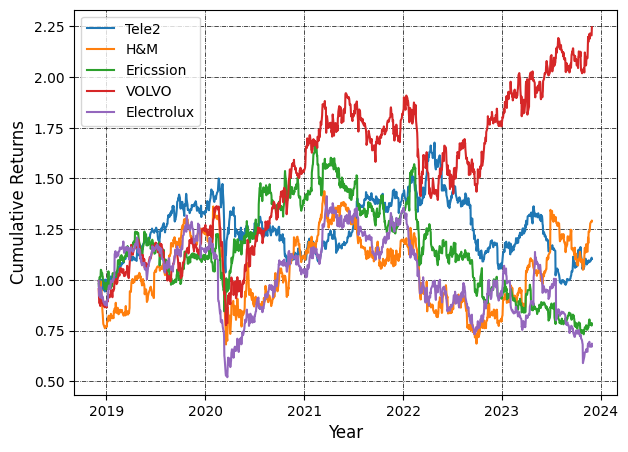

In [ ]:
# Plot all the close prices
((df_close.pct_change()+1).cumprod()).plot(figsize=(7, 5))

# Show the legend
plt.legend()

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xlabel('Year', fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='black', linestyle='-.', linewidth=0.5)
plt.show()

# Bootstrap historical simulation

In [ ]:
#Bootstrap
B=10000
time_frame=90
returns_after_90=[]
initial_investment=100000
weights=np.array([.2,.2,.2,.2,.2])
for b in range(B):
  holdings=weights*initial_investment
  for day in range(time_frame):
    daily_return=df[1:].sample().to_numpy()
    holdings=holdings+holdings*daily_return
  returns_after_90=returns_after_90+[holdings.sum()]


In [ ]:
#Bootstrap
B=10000
time_frame=180
returns_after_180=[]
initial_investment=100000
weights=np.array([.2,.2,.2,.2,.2])
for b in range(B):
  holdings=weights*initial_investment
  for day in range(time_frame):
    daily_return=df[1:].sample().to_numpy()
    holdings=holdings+holdings*daily_return
  returns_after_180=returns_after_180+[holdings.sum()]


In [ ]:
#Bootstrap
B=10000
time_frame=360
returns_after_360=[]
initial_investment=100000
weights=np.array([.2,.2,.2,.2,.2])
for b in range(B):
  holdings=weights*initial_investment
  for day in range(time_frame):
    daily_return=df[1:].sample().to_numpy()
    holdings=holdings+holdings*daily_return
  returns_after_360=returns_after_360+[holdings.sum()]

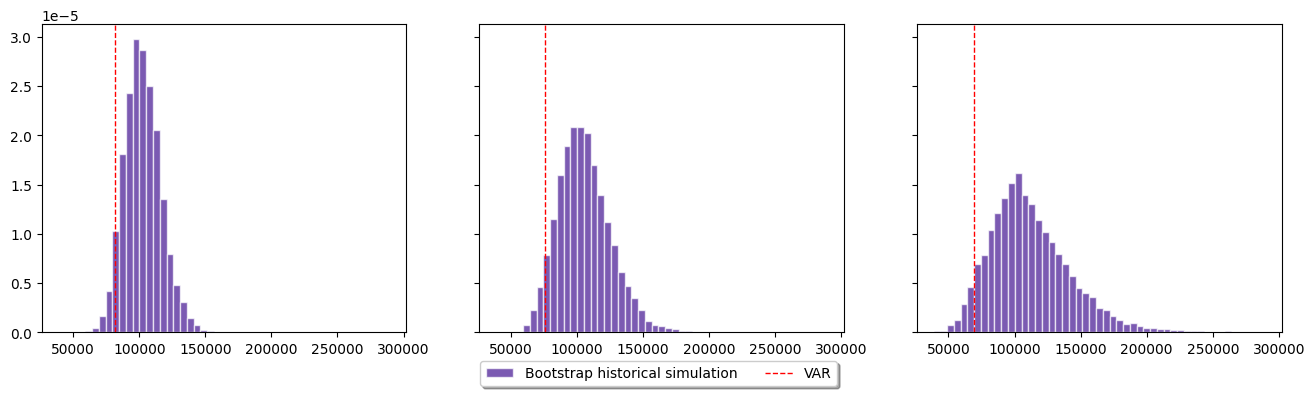

In [ ]:
VAR_90=np.percentile(returns_after_90,5)

VAR_180=np.percentile(returns_after_180,5)

VAR_360=np.percentile(returns_after_360,5)

bins = np.linspace(min(returns_after_90+returns_after_180+returns_after_360),max(returns_after_90+returns_after_180+returns_after_360), 50)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharey=True,sharex=True, figsize=(16, 4))

ax1.hist(returns_after_90,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
ax1.axvline(VAR_90, color='Red', linestyle='dashed', linewidth=1, label='VAR')


ax2.hist(returns_after_180,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
ax2.axvline(VAR_180, color='Red', linestyle='dashed', linewidth=1, label='VAR')
ax2.legend(ncol=3,loc='upper right',bbox_to_anchor=(1, -.07),fancybox=True, shadow=True)


ax3.hist(returns_after_360,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
ax3.axvline(VAR_360, color='Red', linestyle='dashed', linewidth=1, label='VAR')



In [ ]:
VAR_90,VAR_180,VAR_360

(81846.81702575024, 75887.67146527492, 69497.55661019975)

# Monte Carlo Simulation:

In [ ]:
# import data
def get_data(returns):
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

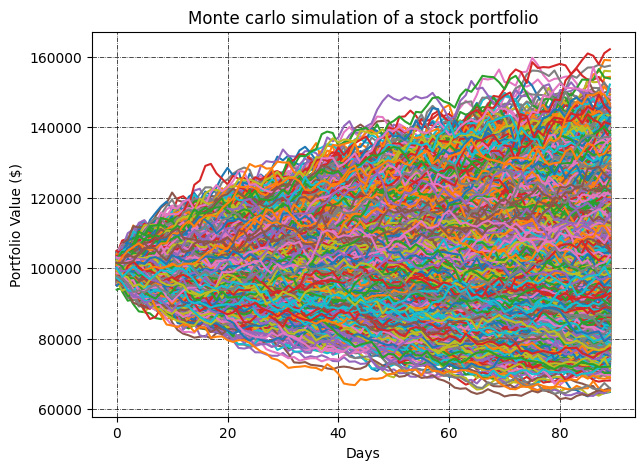

In [ ]:
# Monte Carlo simulation
time_frame= 90
mc_sims = 10000 # number of simulations
meanReturns, covMatrix= get_data(df)
weights = np.array([.2,.2,.2,.2,.2])


meanM = np.full(shape=(time_frame, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(time_frame, mc_sims), fill_value=0.0)

initialPortfolio = 100000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(time_frame, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

mc_returns_after_90=list(portfolio_sims[-1,:])
mc_VAR_90= np.percentile(mc_returns_after_90, 5)

plt.figure(figsize=(7, 5))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte carlo simulation of a stock portfolio')
plt.grid(which="major", color='black', linestyle='-.', linewidth=0.5)
plt.show()

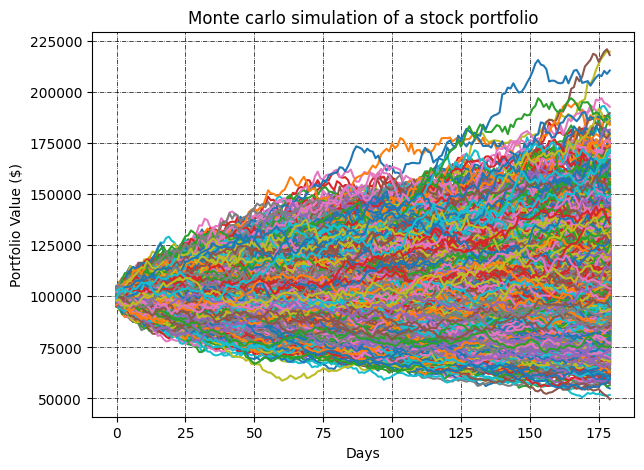

In [ ]:
# Monte Carlo simulation
time_frame= 180
mc_sims = 10000 # number of simulations
meanReturns, covMatrix= get_data(df)
weights = np.array([.2,.2,.2,.2,.2])


meanM = np.full(shape=(time_frame, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(time_frame, mc_sims), fill_value=0.0)

initialPortfolio = 100000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(time_frame, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

mc_returns_after_180=list(portfolio_sims[-1,:])
mc_VAR_180= np.percentile(mc_returns_after_180, 5)

plt.figure(figsize=(7, 5))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte carlo simulation of a stock portfolio')
plt.grid(which="major", color='black', linestyle='-.', linewidth=0.5)
plt.show()

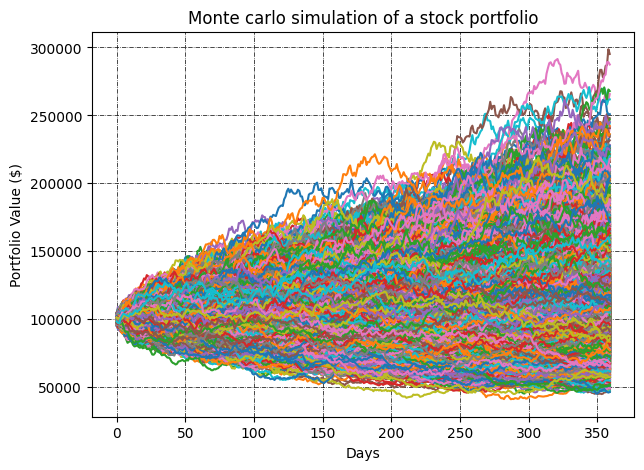

In [ ]:
# Monte Carlo simulation
time_frame= 360
mc_sims = 10000 # number of simulations
meanReturns, covMatrix= get_data(df)
weights = np.array([.2,.2,.2,.2,.2])


meanM = np.full(shape=(time_frame, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(time_frame, mc_sims), fill_value=0.0)

initialPortfolio = 100000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(time_frame, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

mc_returns_after_360=list(portfolio_sims[-1,:])
mc_VAR_360= np.percentile(mc_returns_after_360, 5)

plt.figure(figsize=(7, 5))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte carlo simulation of a stock portfolio')
plt.grid(which="major", color='black', linestyle='-.', linewidth=0.5)
plt.show()

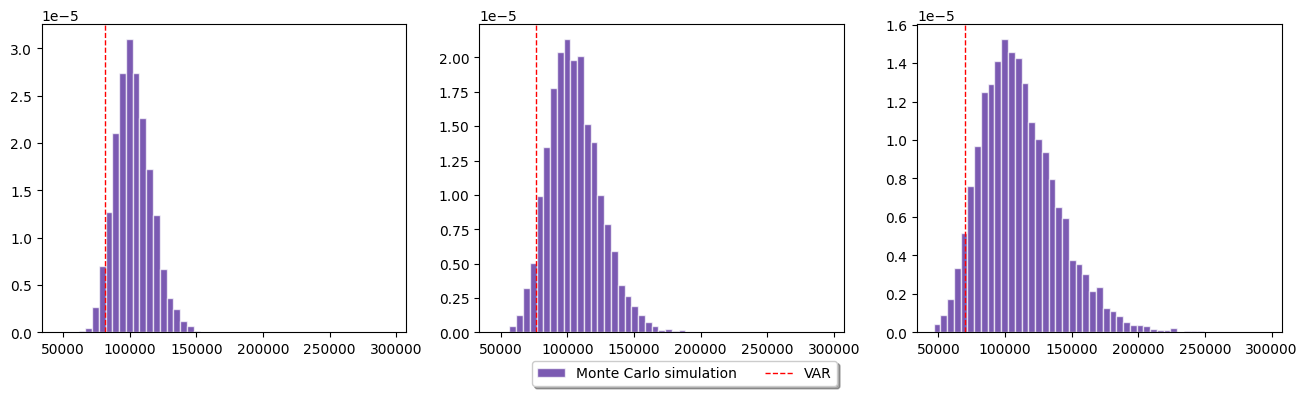

In [ ]:
bins = np.linspace(min(mc_returns_after_90+mc_returns_after_180+mc_returns_after_360),max(mc_returns_after_90+mc_returns_after_180+mc_returns_after_360), 50)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.hist(mc_returns_after_90,bins=bins, alpha=0.7, label='Monte Carlo simulation',density=True, color='#431492',edgecolor = "white")
ax1.axvline(mc_VAR_90, color='Red', linestyle='dashed', linewidth=1, label='VAR')


ax2.hist(mc_returns_after_180,bins=bins, alpha=0.7, label='Monte Carlo simulation',density=True, color='#431492',edgecolor = "white")
ax2.axvline(mc_VAR_180, color='Red', linestyle='dashed', linewidth=1, label='VAR')
ax2.legend(ncol=3,loc='upper right',bbox_to_anchor=(1, -.07),fancybox=True, shadow=True)


ax3.hist(mc_returns_after_360,bins=bins, alpha=0.7, label='Monte Carlo simulation',density=True, color='#431492',edgecolor = "white")
ax3.axvline(mc_VAR_360, color='Red', linestyle='dashed', linewidth=1, label='VAR')
fig.show()


In [ ]:
mc_VAR_90,mc_VAR_180,mc_VAR_360,VAR_90,VAR_180,VAR_360

(81770.3740480322,
 76773.90131026146,
 70141.27647021931,
 81846.81702575024,
 75887.67146527492,
 69497.55661019975)

# Comparison between bootstrap historical simulation and Monte Carlo simulation:

Text(0.5, 1.0, 'Time horizon= 12 months')

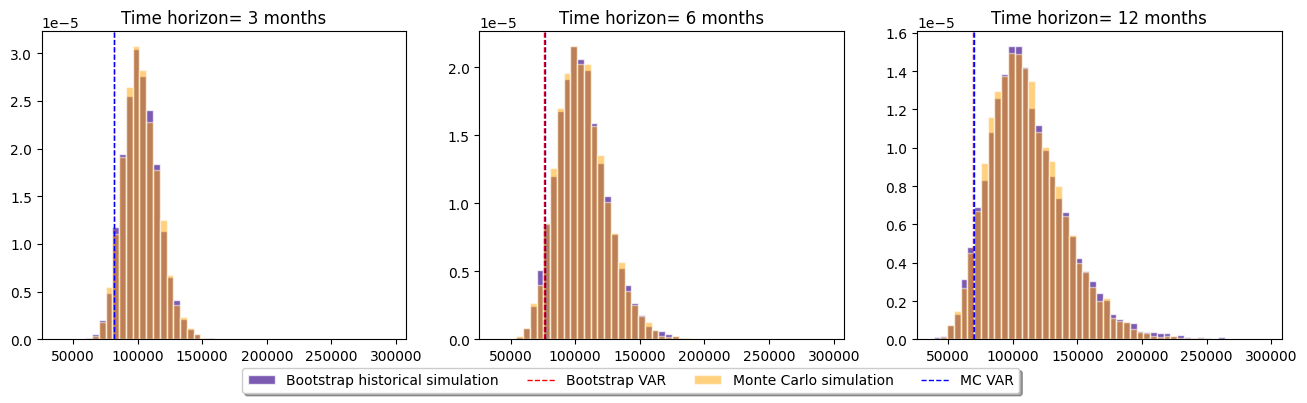

In [ ]:
bins = np.linspace(min(mc_returns_after_90+mc_returns_after_180+mc_returns_after_360+returns_after_90+returns_after_180+returns_after_360),max(mc_returns_after_90+mc_returns_after_180+mc_returns_after_360+returns_after_90+returns_after_180+returns_after_360), 50)

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].hist(returns_after_90,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
axs[0].axvline(VAR_90, color='Red', linestyle='dashed', linewidth=1, label='VAR')
axs[0].hist(mc_returns_after_90,bins=bins, alpha=0.5, label='Monte Carlo simulation',density=True, color='orange',edgecolor = "white")
axs[0].axvline(mc_VAR_90, color='blue', linestyle='dashed', linewidth=1, label='VAR')
axs[0].set_title("Time horizon= 3 months")


axs[1].hist(returns_after_180,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
axs[1].axvline(VAR_180, color='Red', linestyle='dashed', linewidth=1, label='Bootstrap VAR')
axs[1].hist(mc_returns_after_180,bins=bins, alpha=0.5, label='Monte Carlo simulation',density=True, color='orange',edgecolor = "white")
axs[1].axvline(mc_VAR_180, color='blue', linestyle='dashed', linewidth=1, label='MC VAR')
axs[1].legend(ncol=4,loc='upper right',bbox_to_anchor=(1.5, -.07),fancybox=True, shadow=True)
axs[1].set_title("Time horizon= 6 months")

axs[2].hist(returns_after_360,bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
axs[2].axvline(VAR_360, color='Red', linestyle='dashed', linewidth=1, label='95% VAR')
axs[2].hist(mc_returns_after_360,bins=bins, alpha=0.5, label='Monte Carlo simulation',density=True, color='orange',edgecolor = "white")
axs[2].axvline(mc_VAR_360, color='blue', linestyle='dashed', linewidth=1, label='95% VAR')
axs[2].set_title("Time horizon= 12 months")





In [ ]:
[min(returns_after_90+returns_after_90),max(returns_after_90+returns_after_90)],[(100000-min(returns_after_90+returns_after_90))/100000,(max(returns_after_90+returns_after_90)-100000)/100000]

([58172.96039364287, 177058.87367095525],
 [0.4182703960635713, 0.7705887367095524])

In [ ]:
[min(returns_after_180+returns_after_180),max(returns_after_180+returns_after_180)],[(100000-min(returns_after_180+returns_after_180))/100000,(max(returns_after_180+returns_after_180)-100000)/100000]

([49980.48812861588, 205215.85875387042],
 [0.5001951187138413, 1.052158587538704])

In [ ]:
[min(returns_after_360+returns_after_360),max(returns_after_360+returns_after_360)],[(100000-min(returns_after_360+returns_after_360))/100000,(max(returns_after_360+returns_after_360)-100000)/100000]

([38734.81602418565, 289650.6979638149],
 [0.6126518397581435, 1.8965069796381488])

In [ ]:
import time
SD_N=1000
SD_Var_90=np.zeros(SD_N)
for iteration in range(SD_N):
  print(iteration)
  N=1000
  time_frame=90
  returns_after_90=[]
  initial_investment=100000
  weights=np.array([.2,.2,.2,.2,.2])
  for n in range(N):
    holdings=weights*initial_investment
    for day in range(time_frame):
      daily_return=df[1:].sample().to_numpy()
      holdings=holdings+holdings*daily_return

    returns_after_90=returns_after_90+[holdings.sum()]
    SD_Var_90[iteration]= np.percentile(returns_after_90, 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
def get_data(returns):
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

SD_N=1000
SD_mc_Var_90=np.zeros(SD_N)

for iteration in range(SD_N):
  print(iteration)
  time_frame= 90
  mc_sims = 1000 # number of simulations
  meanReturns, covMatrix= get_data(df)
  weights = np.array([.2,.2,.2,.2,.2])


  meanM = np.full(shape=(time_frame, len(weights)), fill_value=meanReturns)
  meanM = meanM.T

  portfolio_sims = np.full(shape=(time_frame, mc_sims), fill_value=0.0)

  initialPortfolio = 100000

  for m in range(0, mc_sims):
      Z = np.random.normal(size=(time_frame, len(weights)))#uncorrelated RV's
      L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
      dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
      portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

  mc_returns_after_90=list(portfolio_sims[-1,:])
  SD_mc_Var_90[iteration]= np.percentile(mc_returns_after_90, 5)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
np.mean(list(SD_mc_Var_90)),np.mean(list(SD_Var_90)),np.std(list(SD_mc_Var_90)),np.std(list(SD_Var_90))

(82037.43647718166, 81983.27432718423, 713.191627445066, 746.0431173779131)

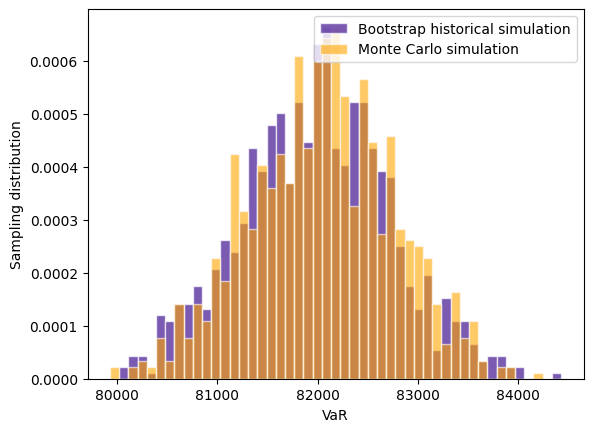

In [ ]:
# histogram compare between the MC and MCAV


bins = np.linspace( min(list(SD_mc_Var_90)+list(SD_Var_90)),max(list(SD_mc_Var_90)+list(SD_Var_90)), 50)

plt.hist(SD_Var_90, bins=bins, alpha=0.7, label='Bootstrap historical simulation',density=True, color='#431492',edgecolor = "white")
plt.hist(SD_mc_Var_90, bins=bins, alpha=0.6, label='Monte Carlo simulation',density=True, color='orange',edgecolor = "white")
#plt.axvline(.139383215447, color='Red', linestyle='dashed', linewidth=1, label='True mean value')
plt.xlabel('VaR')
plt.ylabel('Sampling distribution')

plt.legend(loc='upper right')
plt.show()